In [44]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# For extracting data from each log file
def read(f_name):
    file1 = open(f_name, 'r')
    Lines = file1.readlines()
    count_logs = 0 # to count the no. of log files
    line_no=0 # to keep track of the lines in the file
    arr=[] # to record the line numbers where each log exists
    unique_logs_types=set() # set to keep track of unique types of logs
    unique_logs_type_messages={} # dictionary to keep track of unique log messages by type
    unique_log_type_counts = {} # dictionary to keep count the number of occurances of each type of log
    dates=[] #To get all the dates of the logs
    log = [] #To get all the log
    f2 = open("Detailed_Report_1.txt", "a")

    for line in Lines:
        try:
            time.strptime(line[:22], '%Y-%m-%d %H:%M:%S.%f') # checking if a line is a log file # 'Explanation needed ?'
        except ValueError:
            pass
        else:
            count_logs+=1
            arr.append(line_no)
            dates.append(line[0:10])
            log.append(line[24:29])
            unique_logs_types.add(line[24:29]) # finding the unique types of logs in the log file
        line_no+=1

    for t in unique_logs_types:
        c=0
        for a in arr: # to count the number of occurances of each type of log
            l = Lines[a]
            if t == l[24:29]:
                c+=1
                unique_log_type_counts[t] = c
                if t not in unique_logs_type_messages: # finding all the unique log messages in a log file by type
                    unique_logs_type_messages[t]=set()
                unique_logs_type_messages[t].add(l[l.find(' :'):])

    f2.write("\n============================================================================================================================================================================================================")
    f2.write("\n************************** "+f_name+" **************************")
    f2.write("\nTotal number of logs in the file "+ f_name +" is / are "+str(count_logs))

    f2.write("\nUnique types of logs in this file are :- ")
    for u in unique_logs_types:
        f2.write(str(u))

    f2.write("\nThe Unique logs messages by type are:- ")
    for k in unique_logs_type_messages.keys():
        f2.write("\nThe Following Message Type : "+k+"\n")
        for m in unique_logs_type_messages[k]:
            f2.write(m)
    file1.close()
    return([count_logs,unique_log_type_counts,dates,log])

In [31]:
#For traversing the complete file structure
def finder(path,total_log_files,total_logs,file_log,unique_log_type_count,dates,log):
  l_files = os.listdir(path) # getting all the contents of a particular folder
  for f_name in l_files:# Iterating over all the files
    if '.' not in f_name and f_name != "tomcat-logs": # only checking for log folders
      temp = finder(path +'/'+f_name,total_log_files,total_logs,file_log,unique_log_type_count,dates,log)
      total_log_files=temp[0]
      total_logs=temp[1]
      file_log=temp[2]
      unique_log_type_count = temp[3]
      dates = temp[4]
      log = temp[5]
    elif '.log' in f_name: # only checking for log files
      info = read(path+'/'+f_name)
      count_logs=info[0]
      file_log[path+'/'+f_name]=info[1]
      dates.extend(info[2])
      log.extend(info[3])
      for k in info[1].keys(): # to keep calculating each log type count in the entire dataset
        if k in unique_log_type_count.keys():
            unique_log_type_count[k] = unique_log_type_count[k]+info[1][k]
        else:
            unique_log_type_count[k] = info[1][k]
      total_logs +=count_logs # count the total number of logs
      total_log_files +=1 # count the total number of log files
  return([total_log_files,total_logs,file_log,unique_log_type_count,dates,log])


In [32]:
path = 'C:/Users/shova/Music/Sajib da/Server_data_work/logs'  # directory path in here
file_log = {} # to keep track of logs per file
unique_log_type_count = {} #to keep count of all the unique log type counts

dates=[] #To get all the dates of the logs
log = [] #To get all the log
f1 = open("Report_1.txt", "a")
f1.write("---------------------------------------------------------------------------------- Report / Summery ----------------------------------------------------------------------------------\n")
total = finder(path,0,0,file_log,unique_log_type_count,dates,log)

f1.write("\nTotal number of log file/s in the log folders of the data set " + str(total[0]))
f1.write("\nTotal number of logs in the log folders of the dataset "+str(total[1]))
f1.write("\nThe unique log types and their total count in the log folders of the datasets are :-")
for u in total[3].keys():
    print(" "+u+" : "+str(total[3][u]))
    f1.write(" "+u+" : "+str(total[3][u])+",")
dict1 = total[2]
for file in dict1.keys():
    dict2 = dict1[file]
    f1.write("\n"+file+" :- ")
    for record in dict2.keys():
        f1.write("\n"+record+" : "+str(dict2[record]))
f1.close()

  INFO : 17553
  WARN : 60991
 ERROR : 31816
 DEBUG : 5597939


In [33]:
record = pd.DataFrame({"Dates":[],"Log":[]}) #to keep track of datewise log
record['Dates'] = total[4]
record["Log"] = total[5]

In [34]:
record.head()

,Dates,Log
0,2021-04-21,INFO
1,2021-04-21,INFO
2,2021-04-21,INFO
3,2021-04-21,INFO
4,2021-04-21,INFO


In [35]:
a = record.groupby(['Dates', 'Log']).size() #To find count of each log type datewise 
type(a)

pandas.core.series.Series

In [36]:
times = list(record['Dates'].unique())
log = list(record['Log'].unique())
meta= a.to_dict()
meta.keys()

dict_keys([('2021-01-21', ' INFO'), ('2021-01-21', ' WARN'), ('2021-01-21', 'ERROR'), ('2021-01-22', ' INFO'), ('2021-01-22', ' WARN'), ('2021-01-22', 'ERROR'), ('2021-01-23', ' INFO'), ('2021-01-23', ' WARN'), ('2021-01-23', 'ERROR'), ('2021-01-24', ' INFO'), ('2021-01-24', ' WARN'), ('2021-01-24', 'ERROR'), ('2021-01-25', ' INFO'), ('2021-01-25', ' WARN'), ('2021-01-25', 'ERROR'), ('2021-01-26', ' INFO'), ('2021-01-26', ' WARN'), ('2021-01-26', 'ERROR'), ('2021-01-27', ' INFO'), ('2021-01-27', ' WARN'), ('2021-01-27', 'ERROR'), ('2021-01-28', ' INFO'), ('2021-01-28', ' WARN'), ('2021-01-28', 'ERROR'), ('2021-01-29', ' INFO'), ('2021-01-29', ' WARN'), ('2021-01-29', 'ERROR'), ('2021-01-30', ' INFO'), ('2021-01-30', ' WARN'), ('2021-01-30', 'ERROR'), ('2021-01-31', ' INFO'), ('2021-01-31', ' WARN'), ('2021-01-31', 'ERROR'), ('2021-02-01', ' WARN'), ('2021-02-02', ' WARN'), ('2021-02-03', ' WARN'), ('2021-02-04', ' WARN'), ('2021-02-05', ' WARN'), ('2021-02-06', ' WARN'), ('2021-02-07',

In [37]:
record_mod = pd.DataFrame({"Dates":times}) 
for i in log:
    record_mod[i]=0
record_mod.head()

,Dates,INFO,WARN,ERROR,DEBUG
0,2021-04-21,0,0,0,0
1,2021-04-22,0,0,0,0
2,2021-04-26,0,0,0,0
3,2021-05-02,0,0,0,0
4,2021-06-16,0,0,0,0


In [38]:
for k in meta.keys():
    record_mod.loc[record_mod['Dates']==k[0], k[1]] = meta[k]

record_mod.head()

,Dates,INFO,WARN,ERROR,DEBUG
0,2021-04-21,193,109,100,0
1,2021-04-22,10,129,85,0
2,2021-04-26,83,78,56,0
3,2021-05-02,109,174,135,0
4,2021-06-16,32,33,27,0


In [39]:
record_mod.to_csv('log.csv',index=False)

#### Visualization

<Axes: >

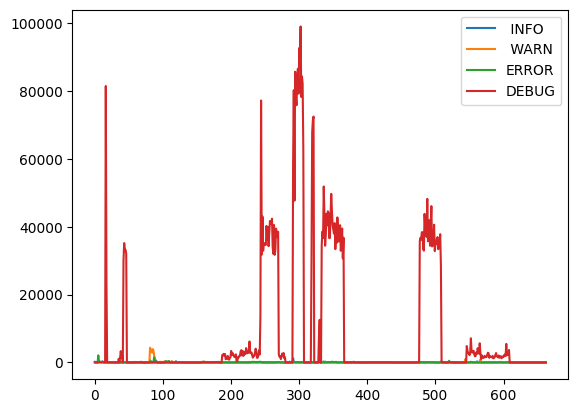

In [41]:
record_mod.plot()

<Axes: ylabel='Frequency'>

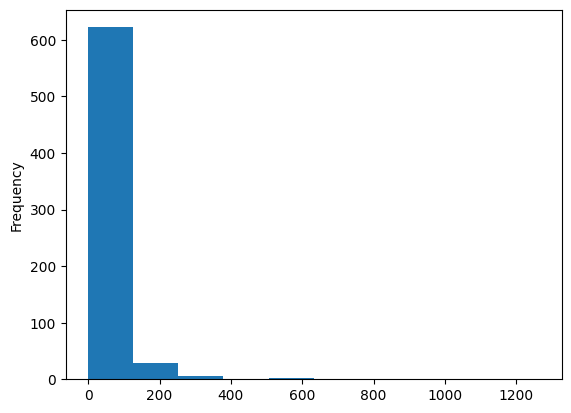

In [43]:
record_mod[' INFO'].plot(kind = 'hist')

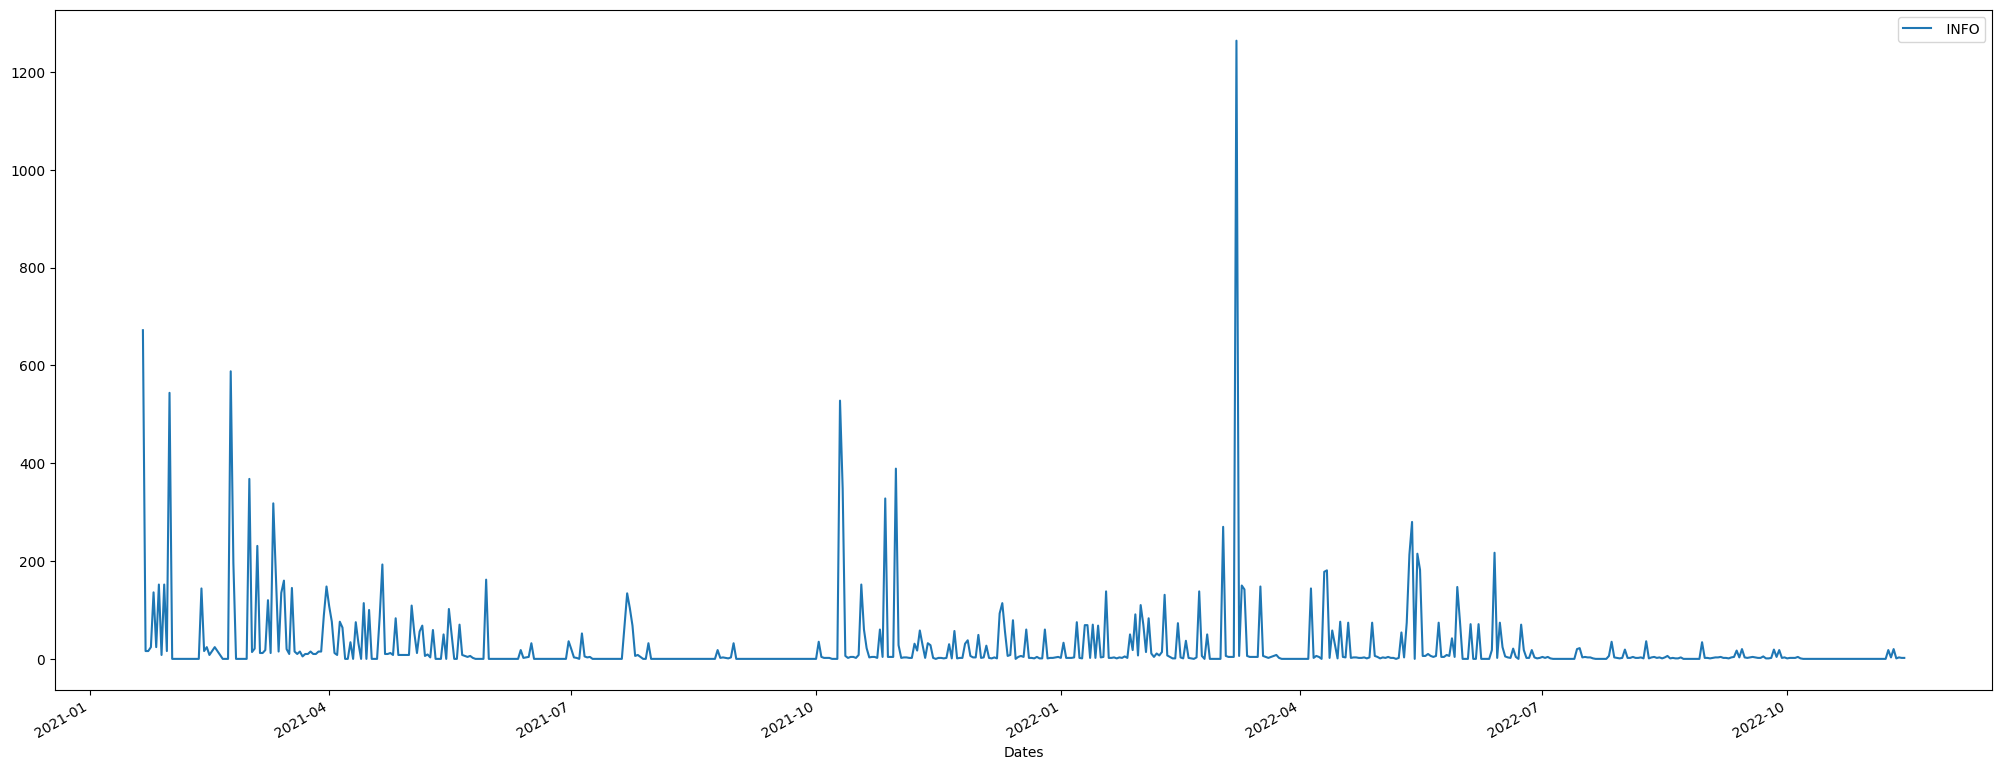

In [48]:
record_mod['Dates'] = pd.to_datetime(record_mod['Dates'], format="%Y-%m-%d")
record_mod.plot(x="Dates", y=[" INFO"],figsize=(25, 10))
plt.show()

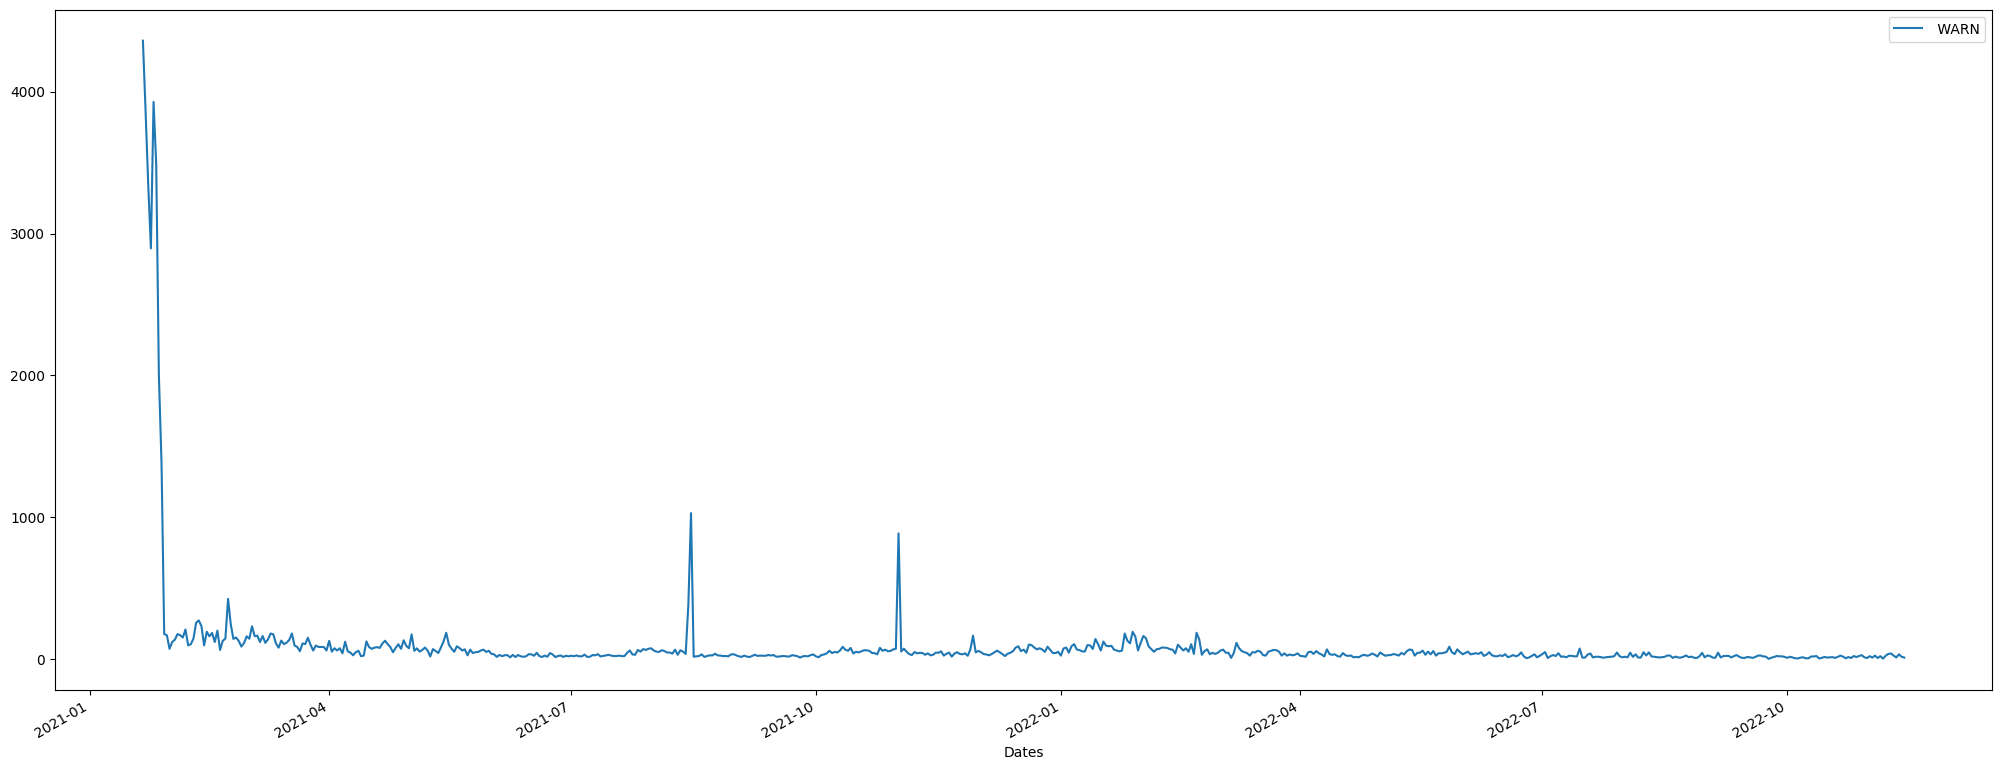

In [49]:
record_mod.plot(x="Dates", y=[" WARN"],figsize=(25, 10))
plt.show()

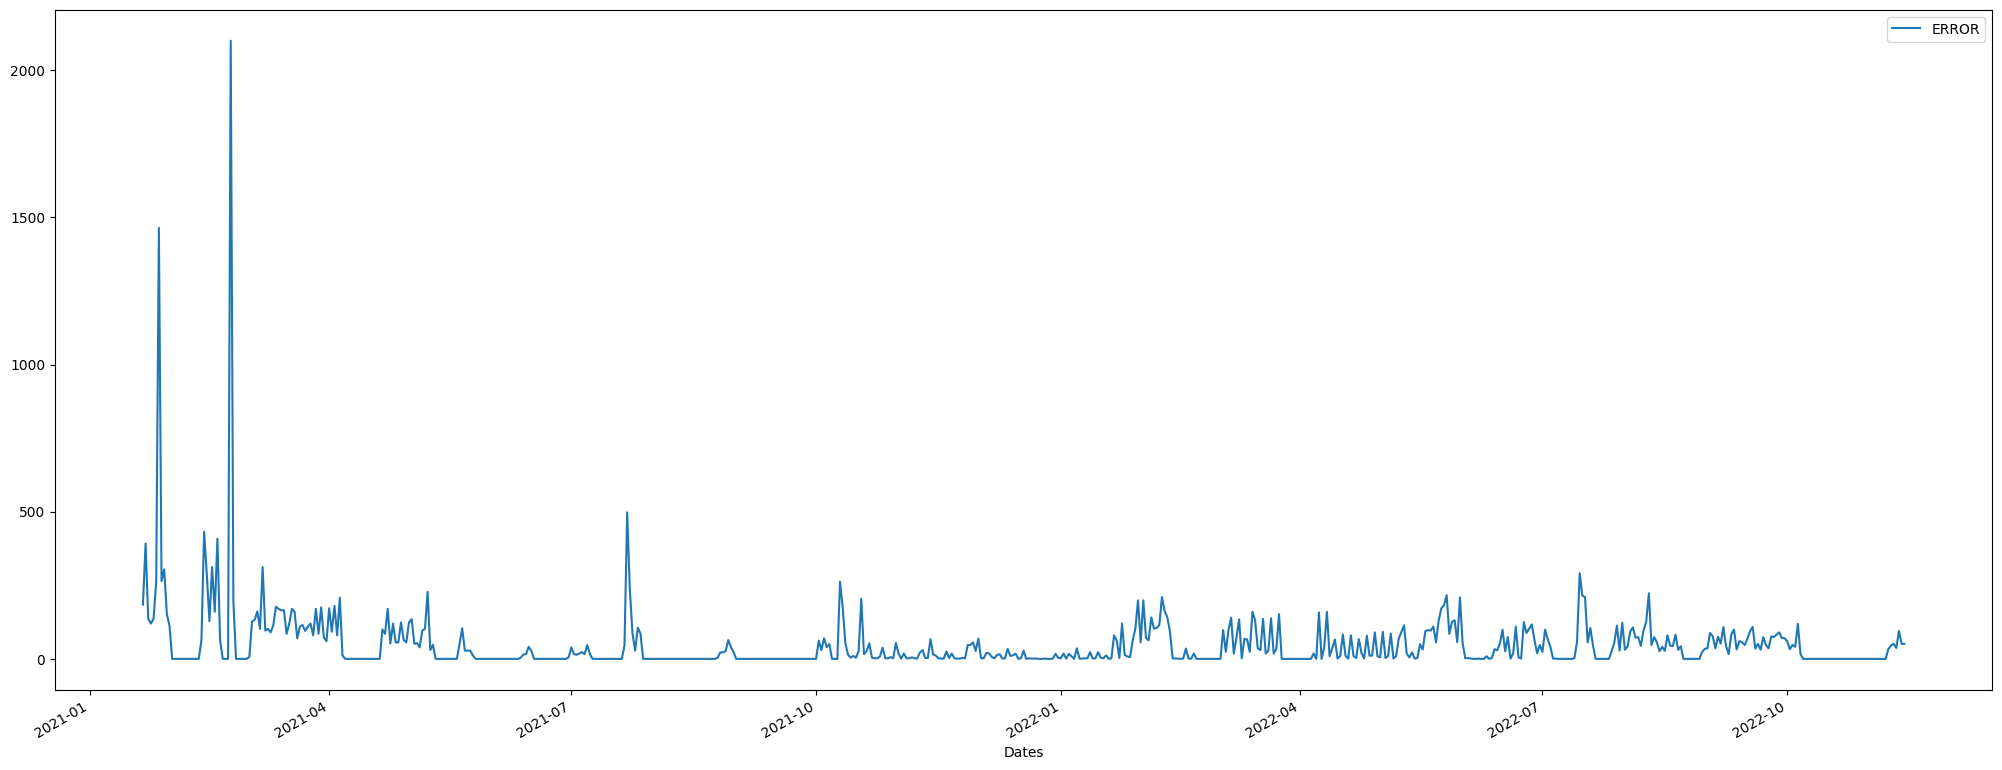

In [50]:
record_mod.plot(x="Dates", y=["ERROR"],figsize=(25, 10))
plt.show()

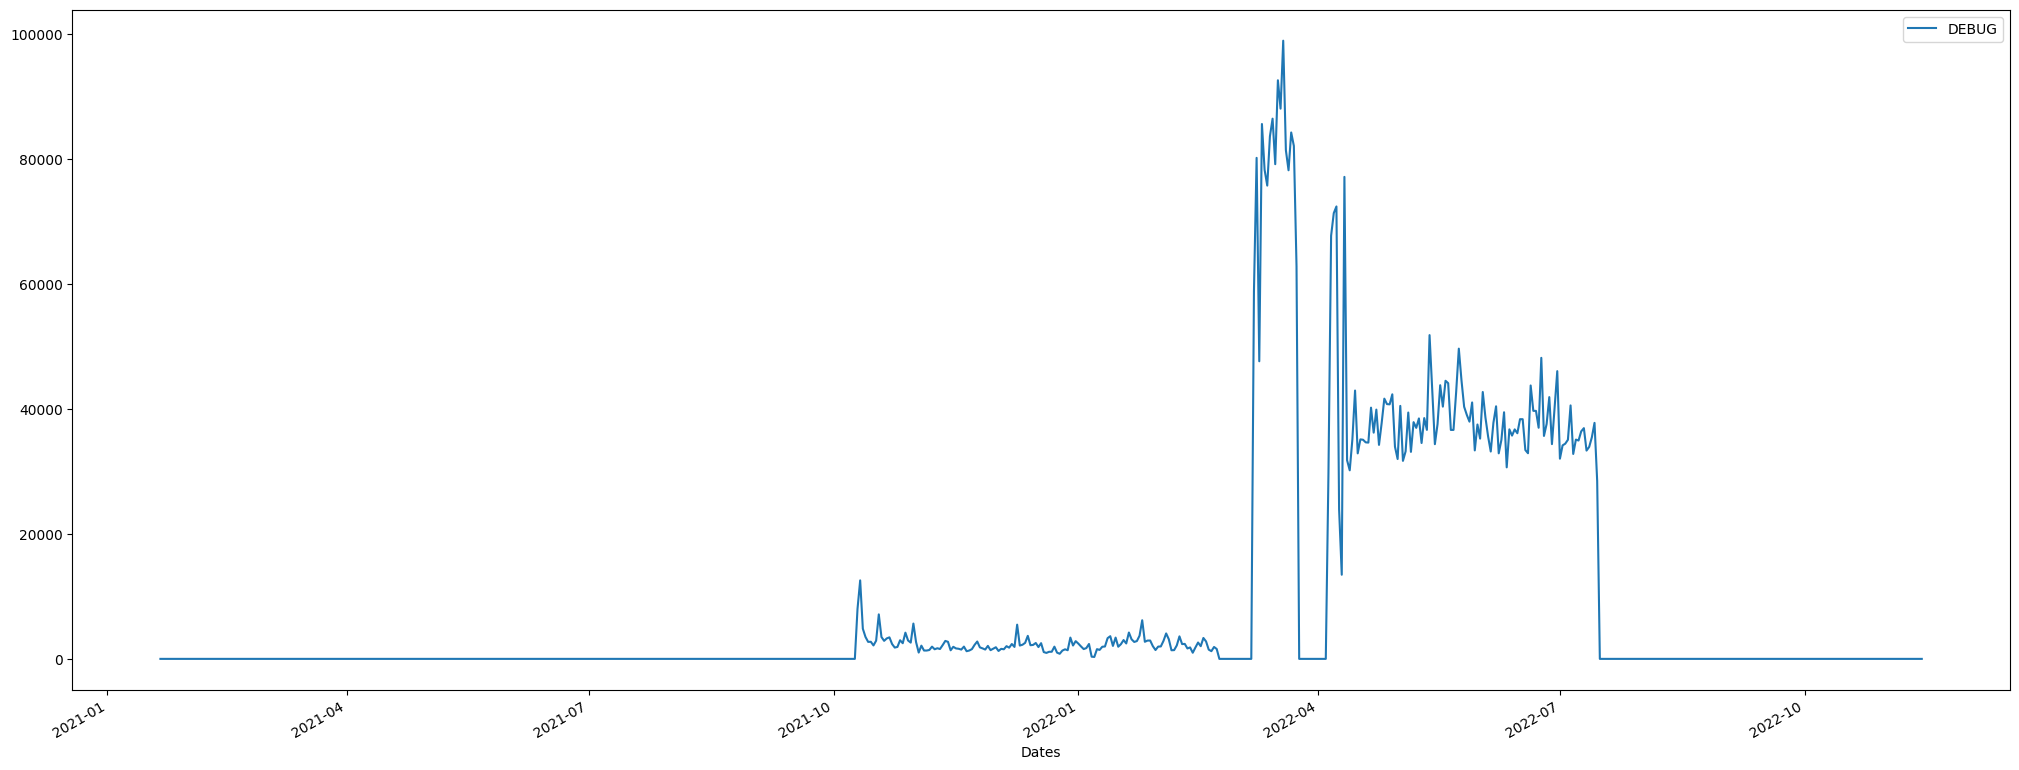

In [51]:
record_mod.plot(x="Dates", y=["DEBUG"],figsize=(25, 10))
plt.show()